In [ ]:
# !pip install langchain
# !pip install langgraph
# !pip install langchain-core
# !pip install langchain-community
# !pip install langchain-openai

In [21]:
from typing import Annotated
from dotenv import load_dotenv
from typing_extensions import TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [22]:
load_dotenv()

True

In [23]:
from langchain.chat_models import init_chat_model

In [24]:
llm = init_chat_model("openai:gpt-5")

In [25]:


class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State) -> State:
    return {"messages": [llm.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()

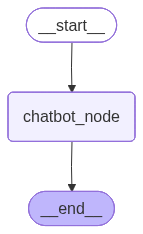

In [26]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
message = {"role": "user", "content": "Name the largest planet in our solar system. Print only the name."}
response = graph.invoke({"messages": [message]})


print(response["messages"][1].content)

Jupiter


In [28]:
state = None

while True:
    in_message = input("You: ")
    if in_message.lower() in {"quit", "exit"}:
        print("Chat ended.")
        break

    if state is None:
        # initialize state with the first user message
        state = {"messages": [{"role": "user", "content": in_message}]}
    else:
        # add the new user message
        state["messages"].append({"role": "user", "content": in_message})

    # run the graph (which calls the LLM)
    state = graph.invoke(state)

    # print the last assistant reply
    last_reply = state["messages"][1].content
    print("Bot:", last_reply)


You:  what is transformers


Bot: “Transformers” can mean a few different things:

- Machine learning architecture: A neural network design (from “Attention Is All You Need,” 2017) that uses self‑attention to handle sequences. It powers models like BERT, GPT, and T5 and is used in NLP, vision, and speech.
- Hugging Face Transformers library: A popular Python library that provides pretrained transformer models and tools to train/use them.
- Electrical engineering: A device that changes AC voltage/current levels via electromagnetic induction.
- Entertainment: The Transformers media franchise (robots that can change forms).

Which one are you asking about?


You:  genearte 2 mcq's


Bot: “Transformers” can mean a few different things:

- Machine learning architecture: A neural network design (from “Attention Is All You Need,” 2017) that uses self‑attention to handle sequences. It powers models like BERT, GPT, and T5 and is used in NLP, vision, and speech.
- Hugging Face Transformers library: A popular Python library that provides pretrained transformer models and tools to train/use them.
- Electrical engineering: A device that changes AC voltage/current levels via electromagnetic induction.
- Entertainment: The Transformers media franchise (robots that can change forms).

Which one are you asking about?


You:  exit


Chat ended.
